<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DanielRobertoMenesesLeon/blob/main/Actividad_Semana4_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


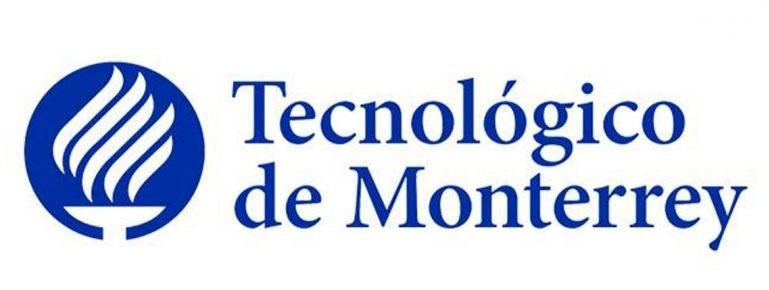

**Semana 4 - Actividad**

profesor: Jobish Vallikavungal Devassia

Daniel Roberto Meneses Leon  - A01794274

## 1.4 Importing and Exporting Data in Python

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers
df.head()
# saving dataFrame to file
#df.to_csv(path)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Getting Started Analyzing Data in Python 4:14


In [ ]:
df.dtypes
df.describe()
# To describe all values including objects
#df.describe(include="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 2 Data Wrangling
### 2.2 Dealing with missing data


In [ ]:
# we use the argument inplace to mutate the dataframe itself!
df.dropna(subset=["prices"], axis=0, inplace=True)



### Replacing missing values with avg

In [ ]:
mean = df["prices"].mean()
df["prices"].replace(np.nan, mean)

## 2.3 Data Formatting

In [ ]:
df['city-mpg'] = 235/df['city-mpg']

### Converting datatype

In [ ]:
df.astype()

df['price'] = df['price'].astype("int")

## 2.3 Data Normalization

In [ ]:
# Simple Scaling
df["length"] = df["length"]/df["length"].max()

## 2.4 Binning in Python
Converting numerical values into categorical bins

In [ ]:
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = np.cut(df['price'], bins, labels=group_names, include_lowest=True)

## 2.5 Turning categorical variables into quantitative variables in Python

In [ ]:
# By using onehot technic
pd.get_dummies(df['fuel'])


# 3 Exploratory Data Analysis (EDA)
## 3.1 Descriptive Statistics


In [ ]:
# Performs basic stadistics operations to all numerical variables.
df.describe()

# For categorical values.
# which gave us a total counts
drive_wheels_counts=df['drive-wheels'].value_counts()

### Scaterplots

In [ ]:
x=df['prce']
y=df['engine-size']
plt.scatter(x, y)

plt.title("Scatterplt for Engine Size vs Price")
plt.ylabel("Engine Size")
plt.xlabel("Price")

## 3.2 GroupBy 
Can be applied into categorical variables by grouping them into categories.

In [ ]:
df_test=df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

## 3.3 Analysis of Variance ANOVA (Analysis of Variance)
Analysis comparasion of groups.
Finding the correlation between different groups of a categorical variable.

In [ ]:
df_anova=df[['make', 'price']]
grouped_anova=df_anova.groupb([['make']])
# applying ANOVA analysis
anova_results_1=stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])

## 3.4 Correlation
Measures to what extent different variables are independent. 

In [ ]:
# Example with regression scatterplot. of a data correlated
sns.regplot(x='engine-size', y='prices', data=df)
plt.ylim(0, )

## 3.5 Correlation - Statistics
### Pearson Correlation
Measures the strengh of the correlation of two values.
outputs two values: Correlation coeficient and p-value

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower', df['price']])

# Module 4 - Model Development
## 4.2 Simple Linear Regression and Multiple Linear Regresion
### Linear Regression
Help us to build a model only for single dependent vairables.

In [ ]:
from sklearn.linear_model import LinearRegression
# Construct the Linear Regression
lm=LinearRegression()

# Select the values
X=df[['highway-mpg']]
Y=df['price']

# fit the model
lm.fit(X, Y)

# predict the model
(B0, B1) = lm.predict(X) # Yhat
#Y =  BO + B1 * MPG(x)

### Multiple Linear Regression
Used to create models from multiple input values in order to predict one dependent value.

In [ ]:
Z = df[['hoursepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# train the model
lm.fit(Z, df['price'])

#Obtain a prediction
Yhat = lm.predict(X)

## 4.3 Model Evaluation Using Visualisation

In [ ]:
import seaborn as sns
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

### Residual Plots
Represents the error between the actual values.
 Thus, helping suggesting the nature of the function

In [ ]:
sns.residplot(df['highway-mpg'], df['price'])

This would be a good example of a Linear Model:
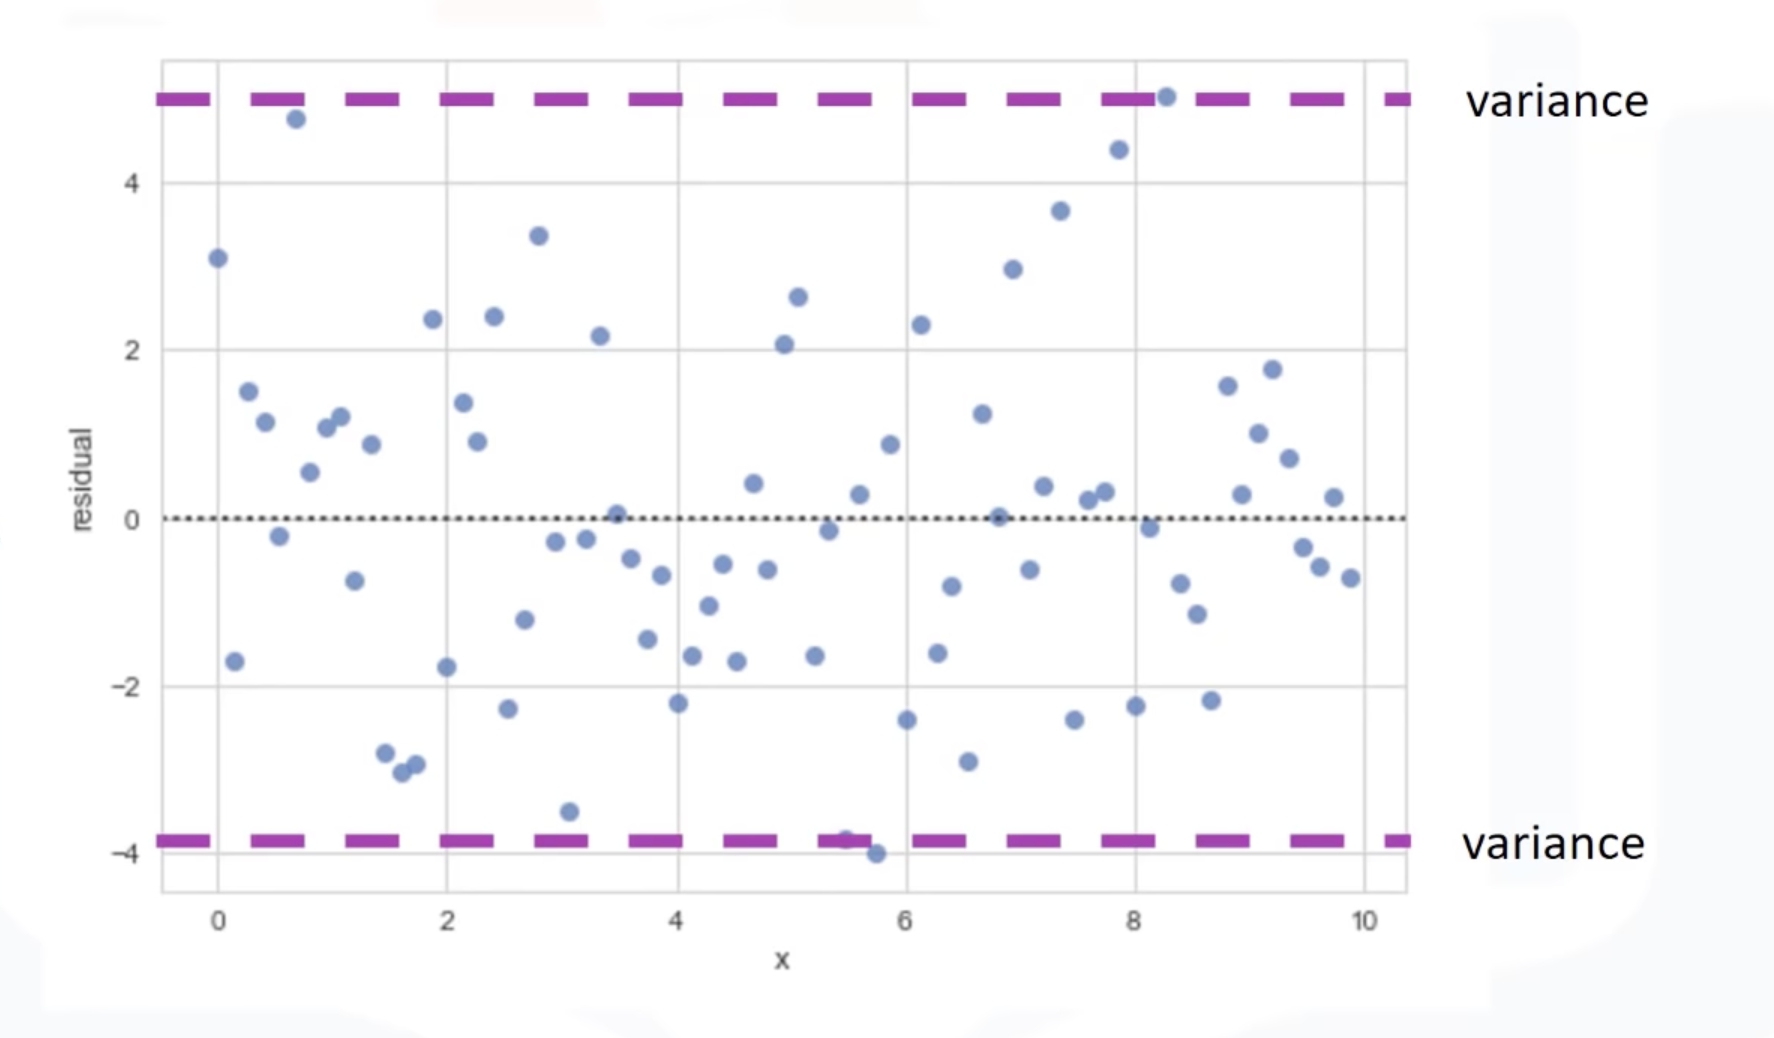

### Distribution Plot
Helps to visualize models with multiple independent variables.

In [ ]:
ax1 = sns.distplot(df['prices'], hist=False, color='red', label='Actual Value')
sns.distplit(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)

## 4.4 Polynomial Regression and Pipelines
### Polynomial Regression
Is a special case of the general linear regression, we used it to take the benefit on describing curvilinear regressions.


In [ ]:
f=np.polyfit(x, y, 3)
p=np.polyId(f)


Unluckly Numpy does not support multi dimension Polynomial Linear Regression, but SkLearn does!.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2, include_bias=False)
x_poly =  pr.fit_transform(x['hoursepower', 'curb-weight'])

Since Polynomail regression can get complex easily we can instead or before do Normalization of the data.
### Data Preprocessing
Normalizing data

In [ ]:
from sklearn.preprocessing import StandardScaler

SCALE=StandarScaler()

# train the object
SCALE.fit(x_data[['hoursepower', 'highway-mpg']])

#tranforming the object
x_scale=SCALE.transform(x_data[['hoursepower', 'highway-mpg']])

But we can even simply the code even more using Pipelines
### Pipeline

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Input=[Input()]
pipe=Pipeline(input)